In [8]:
import os
import csv
import numpy
import pandas
import tensorflow
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier  # Contoh model, bisa diganti sesuai kebutuhan
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
csv_file = 'sensor_data_labeled.csv'
df = pandas.read_csv(csv_file)

df = df.drop(columns=['datetime', 'epoch', 'humidity', 'pressure'])
df['voc'] = pandas.to_numeric(df['voc'], errors='coerce')
df = df.dropna(subset=['voc'])
df['voc'] = df['voc'].astype(int)
df.head()


,dust,mq135,mq7,temperature,voc,label
0,21,5006,3357,28.55,139,normal
1,25,5012,3356,28.55,138,normal
2,18,5009,3357,28.55,139,normal
3,26,5002,3352,28.56,139,normal
4,23,4997,3347,28.54,127,normal


In [3]:
print("Distribusi Label:")
print(df['label'].value_counts())
print("\n")

Distribusi Label:
label
aktivitas     1500
makanminum    1500
kimia         1500
normal        1499
Name: count, dtype: int64




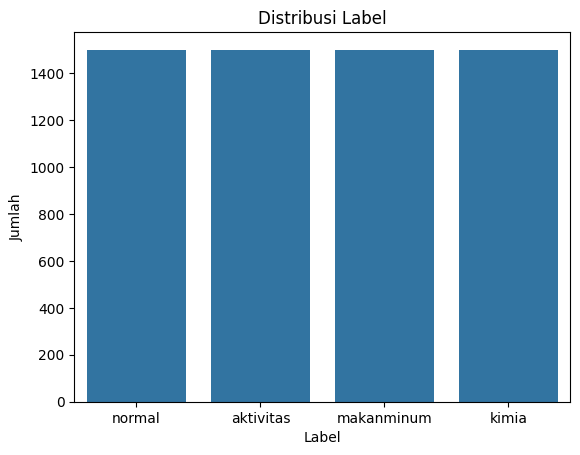

In [6]:

sns.countplot(x='label', data=df)
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

In [10]:
X = df.drop(columns=["label"])  # Fitur
y = df["label"]  # Label

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Gunakan shuffle untuk data acak

# Model yang akan digunakan (contoh RandomForest)
model = RandomForestClassifier(random_state=42)

# List untuk menyimpan hasil validasi
fold_accuracies = []

# Iterasi pada setiap fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Bagi data ke dalam training dan testing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    model.fit(X_train, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)
    
    print(f"Fold {fold}: Accuracy = {accuracy:.2f}")

# Rata-rata akurasi
mean_accuracy = numpy.mean(fold_accuracies)
print(f"\nMean Accuracy Across Folds: {mean_accuracy:.2f}")

Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 1.00

Mean Accuracy Across Folds: 1.00


In [6]:
X = df[['dust', 'mq135', 'mq7', 'temperature', 'voc']].values

y_labels = df['label'].values

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_labels)
y_categorical = to_categorical(y_encoded)



In [9]:
print(len(y_categorical))
print(y_categorical[1600])

5999
[1. 0. 0. 0.]


In [7]:
categories = ['aktivitas','kimia','makanminum', 'normal']

In [11]:
model = Sequential([
    Dense(64, input_shape=(5,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y_categorical, epochs=100, batch_size=4, verbose=1, validation_split=0.4)


Epoch 1/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7494 - loss: 0.6992 - val_accuracy: 0.3750 - val_loss: 49.8861
Epoch 2/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8923 - loss: 0.3222 - val_accuracy: 0.3750 - val_loss: 49.1356
Epoch 3/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8999 - loss: 0.2909 - val_accuracy: 0.3750 - val_loss: 40.9288
Epoch 4/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8988 - loss: 0.2796 - val_accuracy: 0.3750 - val_loss: 36.4165
Epoch 5/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9023 - loss: 0.2805 - val_accuracy: 0.3750 - val_loss: 37.8394
Epoch 6/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8915 - loss: 0.3025 - val_accuracy: 0.3750 - val_loss: 43.6925
Epoch 7/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9108 - loss: 0.2473 - val_accuracy: 0.3750 - val_loss: 54.6323
Epoch 8/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9131 - loss: 0.2532 - v

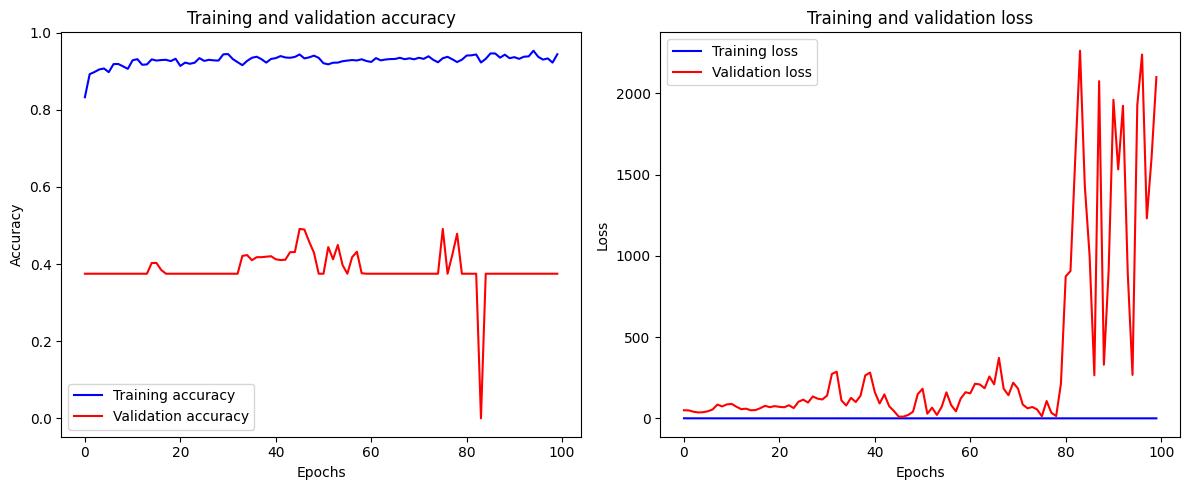

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
model.save('model_feedforward.h5')

In [15]:
id = 4500
print(X[id])
print(y_labels[id])

data_to_predict = numpy.array([[  24. ,  5949.  , 4714.,28.77, 94.]]) 
y_pred = model.predict(data_to_predict)

predicted_class = numpy.argmax(y_pred, axis=1)
print(f"Prediksi kelas: {categories[predicted_class[0]]} >> {[predicted_class[0]]}")


[  24.   5949.   4714.     28.77   94.  ]
kimia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediksi kelas: normal >> [np.int64(3)]


In [17]:
loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Loss: 840.5592, Accuracy: 0.7500


In [19]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_feedforward_2.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\atmatech\AppData\Local\Temp\tmp9v6_w04w\assets


INFO:tensorflow:Assets written to: C:\Users\atmatech\AppData\Local\Temp\tmp9v6_w04w\assets


Saved artifact at 'C:\Users\atmatech\AppData\Local\Temp\tmp9v6_w04w'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2163619508496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163619510992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163619511568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163619511376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163619511760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163619510224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163620004112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163620005264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163620004496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163620005072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2163620005